Dataset: **Sunspots** 
(Annual 1700 - 2008)

Model: SARIMA

Type: Univariate

In [1]:
# importing required libraries
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm # statsmodels comes with built-in datasets, can load a time-series dataset straight into memory.
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [3]:
data = sm.datasets.sunspots.load_pandas() # sunspots dataset
y = data.data
y.shape

(309, 2)

In [4]:
y.tail(5)

,YEAR,SUNACTIVITY
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5
308,2008.0,2.9


In [5]:
y.index = pd.Index(sm.tsa.datetools.dates_from_range("1700", "2008"))
y.index.freq = y.index.inferred_freq
del y["YEAR"]

In [6]:
y.tail(5)

,SUNACTIVITY
2004-12-31,40.4
2005-12-31,29.8
2006-12-31,15.2
2007-12-31,7.5
2008-12-31,2.9


In [7]:
y.dtypes

SUNACTIVITY    float64
dtype: object

In [8]:
# when working with **time-series data** in Python, ensure that **dates** are used as an index
y.index

DatetimeIndex(['1700-12-31', '1701-12-31', '1702-12-31', '1703-12-31',
               '1704-12-31', '1705-12-31', '1706-12-31', '1707-12-31',
               '1708-12-31', '1709-12-31',
               ...
               '1999-12-31', '2000-12-31', '2001-12-31', '2002-12-31',
               '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31',
               '2007-12-31', '2008-12-31'],
              dtype='datetime64[ns]', length=309, freq='A-DEC')

- **dtype=datetime[ns]** field confirms that the **index** is at date stamp objects. 
- A-DEC, Annual indexing to the end of the year, DEC

#### Visualize the data to check
- seasonality: data display a clear periodic pattern?
- trend: data follow a consistent upwards or downward slope?
- noise: any outlier points or missing values that are not consistent with the rest of the data?

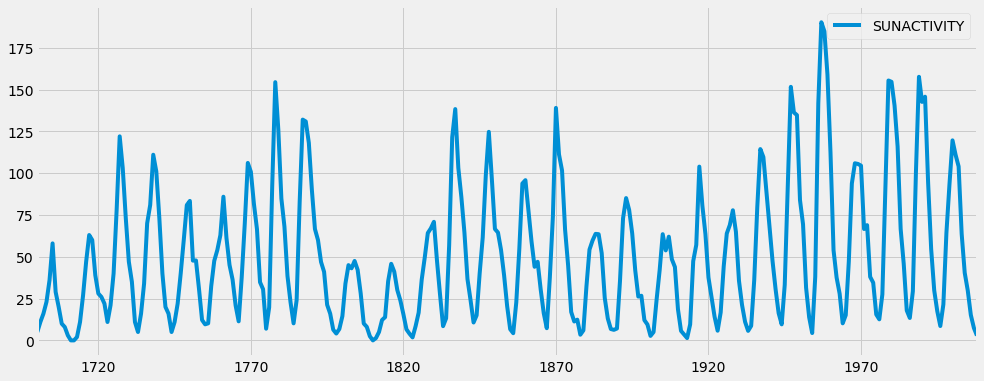

In [9]:
y.plot(figsize=(15, 6))
plt.show()

#### Interpret:


#### Visualize the data using time-series decomposition
to quickly identify a changing **mean or variation** in the data / to understand the structure of the time-series

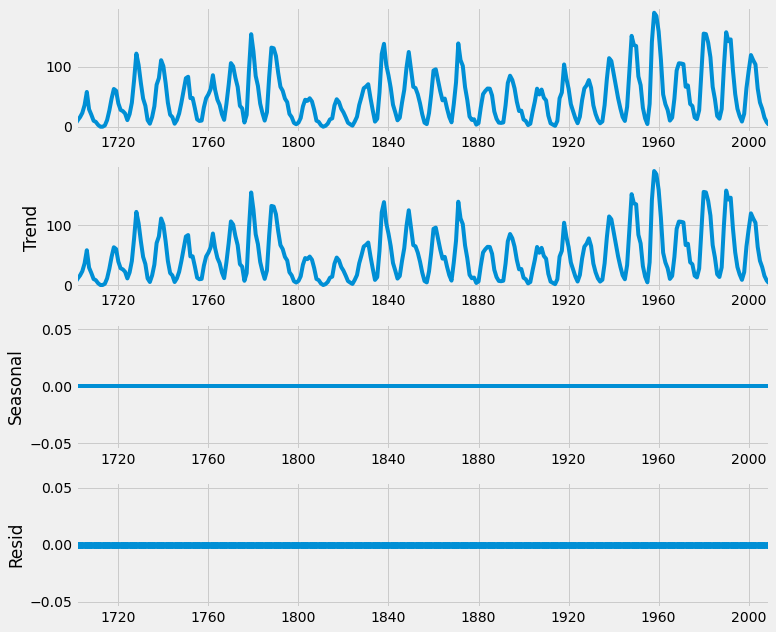

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

#### Interpret:


### ACF & PACF plots

C:\Users\kamon\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


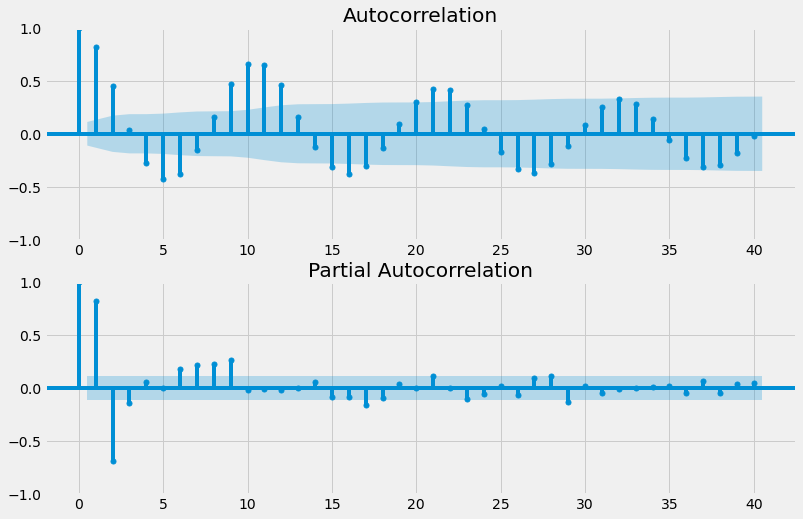

In [11]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(y.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y, lags=40, ax=ax2)

### Selecting optimal set of parameters

the correct parametrization of ARIMA models can be a painstaking manual process that requires domain expertise and time. 

In [12]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


AIC(Akaike Information Criterion) \
how well a model fits the data while taking into account the overall complexity of the model.

In [13]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3439.710598624912
SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3155.618267417884
SARIMAX(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3049.1506172991085
SARIMAX(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2931.5259900073524
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3033.780146812068
SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3026.4798616470093
SARIMAX(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2942.7951482313892
SARIMAX(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2886.6371323060703
SARIMAX(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3096.120821507832
SARIMAX(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2861.6446018358515
SARIMAX(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2811.1324777456366
SARIMAX(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2678.639746799111
SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2793.0259964973006
SARIMAX(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2786.628965533465
SARIMAX(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2713.7993981749414
SARIMAX(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2642.560831315707
SARIMAX(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2824.8598075257105
SARIMAX(0, 1, 0)x(0, 

SARIMAX(1, 1, 1)x(1, 1, 1, 12) yields the lowest AIC value of 2537.42.

### Fitting an ARIMA Time Series Model

In [14]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3857      0.082      4.692      0.000       0.225       0.547
ma.L1          0.2085      0.091      2.290      0.022       0.030       0.387
ar.S.L12       0.0164      0.029      0.575      0.565      -0.039       0.072
ma.S.L12      -1.0000      0.065    -15.366      0.000      -1.128      -0.872
sigma2       409.4618      0.000   2.58e+06      0.000     409.461     409.462


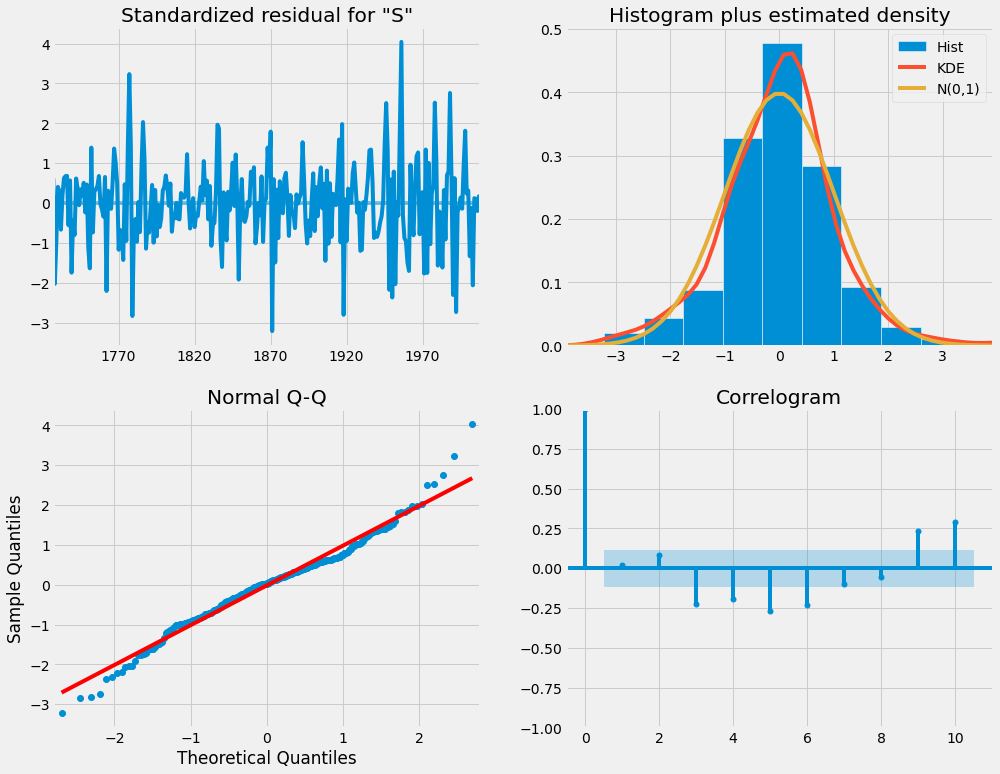

In [15]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

### Validating Forecasts

##### One-step ahead forecasts

In [16]:
pred = results.get_prediction(start=pd.to_datetime('1998-12-31'), dynamic=False) # forecasts to start at January 1998
pred_ci = pred.conf_int()

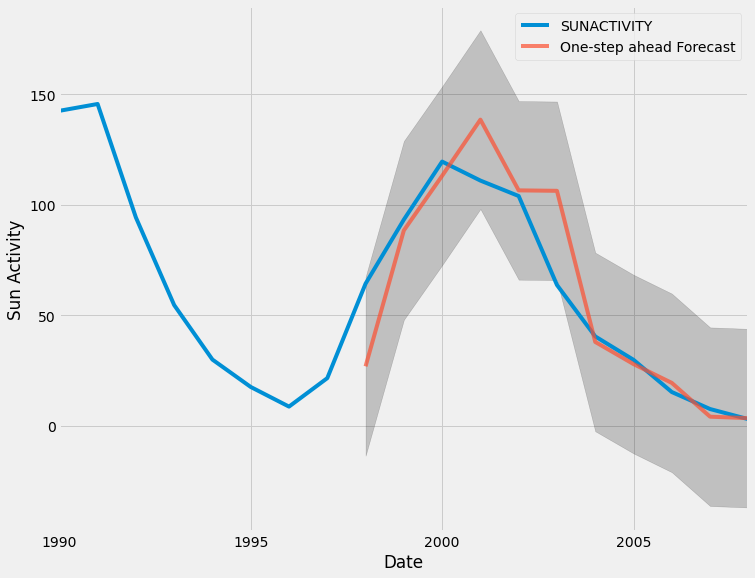

In [17]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Sun Activity')
plt.legend()

plt.show()

In [18]:
y_forecasted = pred.predicted_mean
y_truth = y['1998-12-31':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1998-12-31 00:00:00   NaN
1999-12-31 00:00:00   NaN
2000-12-31 00:00:00   NaN
2001-12-31 00:00:00   NaN
2002-12-31 00:00:00   NaN
2003-12-31 00:00:00   NaN
2004-12-31 00:00:00   NaN
2005-12-31 00:00:00   NaN
2006-12-31 00:00:00   NaN
2007-12-31 00:00:00   NaN
2008-12-31 00:00:00   NaN
SUNACTIVITY           NaN
dtype: float64


##### Dynamic forecasts

In [19]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1998-12-31'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

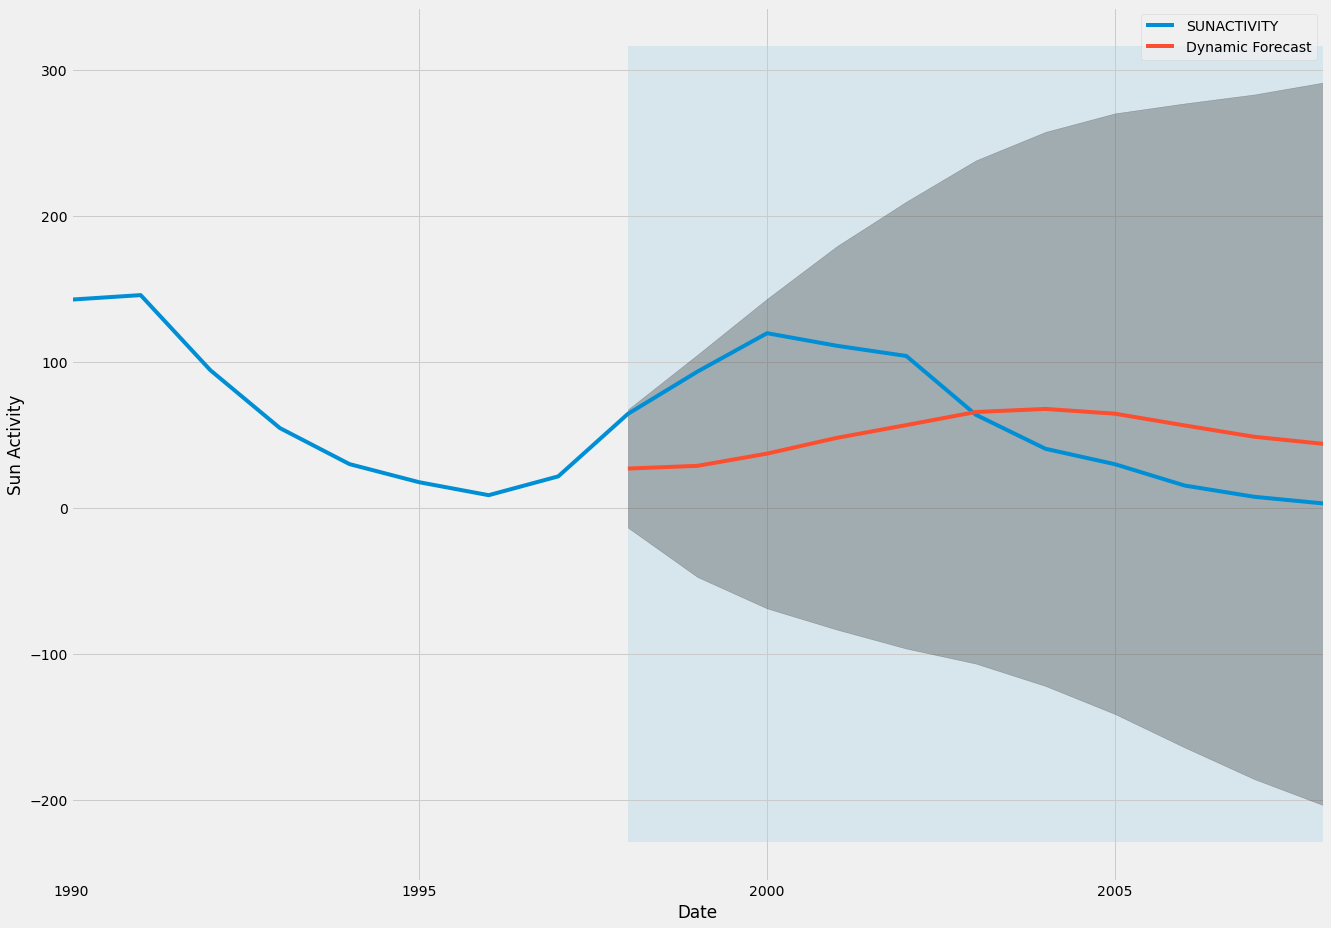

In [20]:
ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-12-31'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Sun Activity')

plt.legend()
plt.show()

In [21]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['1998-12-31':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1998-12-31 00:00:00   NaN
1999-12-31 00:00:00   NaN
2000-12-31 00:00:00   NaN
2001-12-31 00:00:00   NaN
2002-12-31 00:00:00   NaN
2003-12-31 00:00:00   NaN
2004-12-31 00:00:00   NaN
2005-12-31 00:00:00   NaN
2006-12-31 00:00:00   NaN
2007-12-31 00:00:00   NaN
2008-12-31 00:00:00   NaN
SUNACTIVITY           NaN
dtype: float64


### Producing and Visualizing Forecasts

In [22]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=200)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

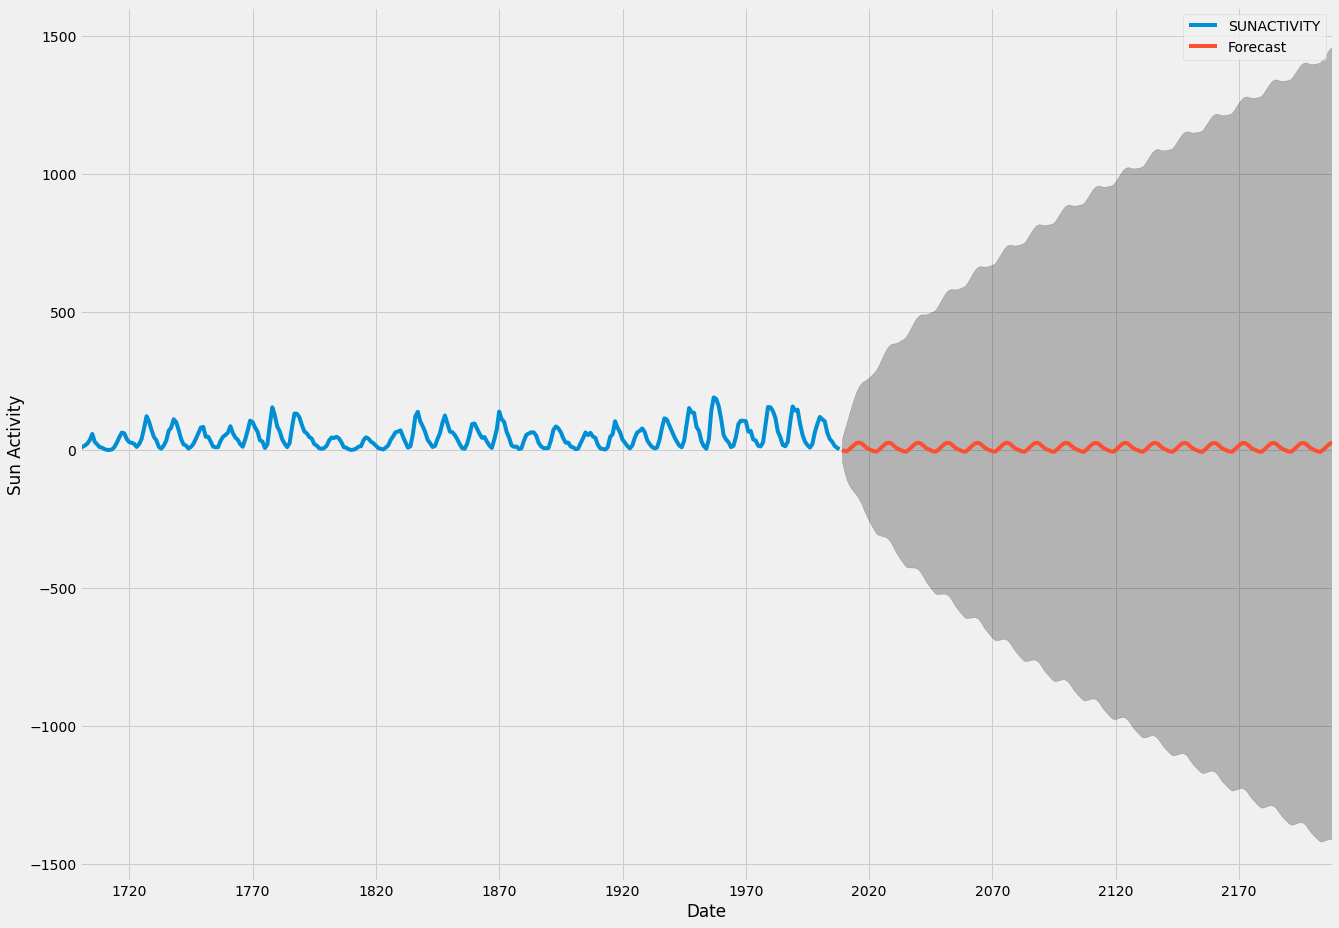

In [23]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sun Activity')

plt.legend()
plt.show()

Reference Src : https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3